In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


Here in this project, we are analysing the candidates for a company, which is promptly active in the fields of Big Data and Data Science and looking forward to hire data scientists who successfully completed courses conducted by the company as the eligibility criteria. To satisfy the eligibility criteria, many candidates signup for the aforesaid training conducted by the company.
Company would like to assess the possibilities that candidates will retained and continue to work with them or would like to move after completing their training for new employment opportunities.
This analysis will help the company in several ways like shortlisting of candidates, categorization, planning the appropriate course for the candidates, improve quality of training and reducing time and cost.
The analysis will be based on different parameters provided by candidates while signing up for the training such as demographic, education, experience etc.


**Features**
* enrollee_id : Unique ID for candidate
* city: City code
* city_ development _index : Development index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* ****target: 0 – Not looking for job change, 1 – Looking for a job change****

### Importing and exploring the dataset

In [7]:
df = pd.read_csv('aug_train.csv')

In [8]:
df.shape

(19158, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#### Dropping the columns which are not very useful and not having reasonable relation with the required analysis.

In [11]:
df.drop(['enrollee_id'],axis=1,inplace=True)
df.drop(['city'],axis=1,inplace=True)
df.drop(['company_size'],axis=1,inplace=True)
df.drop(['last_new_job'],axis=1,inplace=True)

## Missing Value Analysis

In [12]:
df.isnull().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_type              6140
training_hours               0
target                       0
dtype: int64

In [13]:
df.isnull().mean()

city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_type              0.320493
training_hours            0.000000
target                    0.000000
dtype: float64

* From above, we can clearly states that only 4 components have been properly filled by the candidates out of 10, whereas 6 are having null or missing values. Company_type is having highest null values 32% (approx) followed by gender 23% (approx).

## Visualisation and Missing Values Treatment 

In this section,
* First, we will verify the data through visualization to observe and identify any possible pattern in the data,
* Second, we will treat the missing values to complete the data, by replacing the null values with the highest number of component available in the column.
* Third, we will encode the data by using get_dummies() method
* and last, we will use dropping features for all those components which are relatively less significant for the analysis.


 #### a) city_development_index

<AxesSubplot:xlabel='city_development_index', ylabel='Density'>

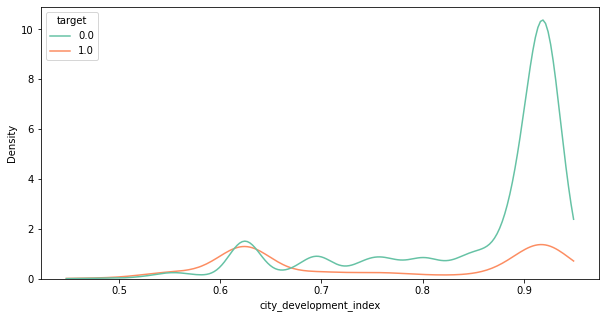

In [14]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="city_development_index", hue="target",cut = 0,palette='Set2')

* From this graph, we can observe that persons who live in developed cities have a lower likelihood of changing occupations.

#### b) gender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Other')])

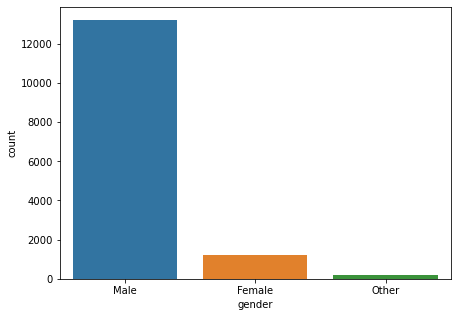

In [15]:
plt.figure(figsize=(7,5))
ax=sns.countplot(df.gender)

plt.xticks(rotation=0)

* The number of male candidates who applied for the job is the highest.

In [16]:
df['gender'].isnull().sum()

4508

In [17]:
df["gender"].fillna("Male", inplace = True)
sex = pd.get_dummies(df['gender'])
df.drop(['gender'],axis=1,inplace=True)
df = pd.concat([df,sex],axis=1)
df.drop(['Other'],axis=1,inplace=True) 

#### c)relevant_experience

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


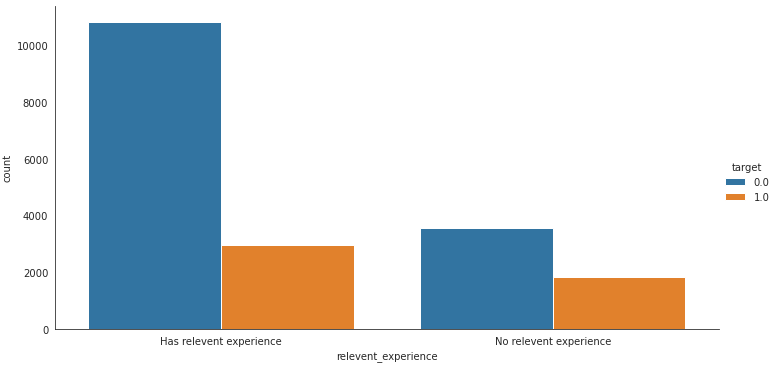

In [18]:
with sns.axes_style('white'):
    rel_exp = sns.factorplot("relevent_experience", data=df, aspect=2.0, kind='count',
                       hue='target')
    
    

* Here, from the above chart, we can analyse that candidates who are having relevant experience in the concerned field are less likely to switch their job in comparison to the others who have no relevant experience.

In [19]:
rel_exp = pd.get_dummies(df['relevent_experience'])
df.drop(['relevent_experience'],axis=1,inplace=True)
df = pd.concat([df,rel_exp],axis=1)
df.drop(['No relevent experience'],axis=1,inplace=True)


#### d) enrolled_university

In [20]:
df["enrolled_university"].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [21]:
df["enrolled_university"].fillna("no_enrollment", inplace = True)
enrol_uni = pd.get_dummies(df['enrolled_university'])
df.drop(['enrolled_university'],axis=1,inplace=True)
df = pd.concat([df,enrol_uni],axis=1)
df.drop(['Part time course'],axis=1,inplace=True) 

#### e) education_level

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


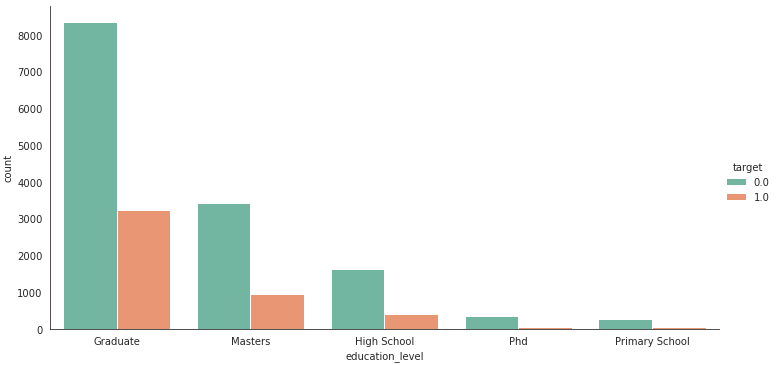

In [22]:
with sns.axes_style('white'):
    rel_exp = sns.factorplot("education_level", data=df, aspect=2.0, kind='count',
                       hue='target',palette = 'Set2')

* Most of the candidates are having graduation as their highest qualificatiojn followed by masters, and very few candidates are having Phd as their qualification.

In [23]:
df["education_level"].fillna("Graduate", inplace = True)
edu_level = pd.get_dummies(df['education_level'])
df.drop(['education_level'],axis=1,inplace=True)
df = pd.concat([df,edu_level],axis=1)

df.drop(['Phd','Primary School'],axis=1,inplace=True)

#### f) major_discipline

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STEM'),
  Text(1, 0, 'Business Degree'),
  Text(2, 0, 'Arts'),
  Text(3, 0, 'Humanities'),
  Text(4, 0, 'No Major'),
  Text(5, 0, 'Other')])

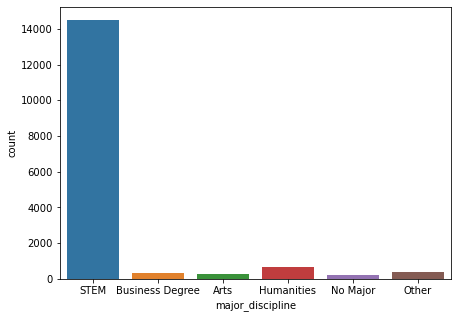

In [24]:
plt.figure(figsize=(7,5))
ax=sns.countplot(df.major_discipline)
plt.xticks(rotation=0)

* Majority of the candidates are from STEM.

In [25]:
df["major_discipline"].fillna("STEM", inplace = True)
m_disci = pd.get_dummies(df['major_discipline'])
df.drop(['major_discipline'],axis=1,inplace=True)
df= pd.concat([df,m_disci],axis=1)

df.drop(['Business Degree','Arts','Humanities','No Major','Other'],axis=1,inplace=True)

#### g) experience

In [26]:
df["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [27]:
df["experience"].fillna("20", inplace = True)
df.replace({"experience":{">20":20,"<1":1}},inplace = True)

In [28]:
df["experience"]= df["experience"].astype("int64")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


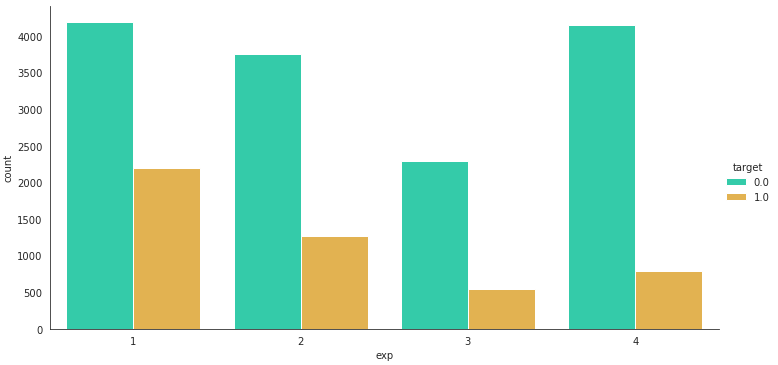

In [29]:
def exp(x):
    if  (x['experience'])  >= 1 and (x['experience'])  <= 5 :
        return 1
    elif  (x['experience'])  >= 6 and (x['experience'])  <= 10 :
        return 2
    elif  (x['experience'])  >= 11 and (x['experience'])  <= 15 :
        return 3
    else :
        return 4

df['exp'] = df.apply(exp, axis = 1)

with sns.axes_style('white'):
    rel_exp = sns.factorplot("exp", data=df, aspect=2.0, kind='count',
                       hue='target',palette = 'turbo')

* According to the analysis, those who are having less experience are more vulnerable to switch their job, rather than those who are having more experience.

In [30]:
df.drop(['experience'],axis=1,inplace=True)
df.drop(['exp'],axis=1,inplace=True)

#### h) company_type

In [31]:
df["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


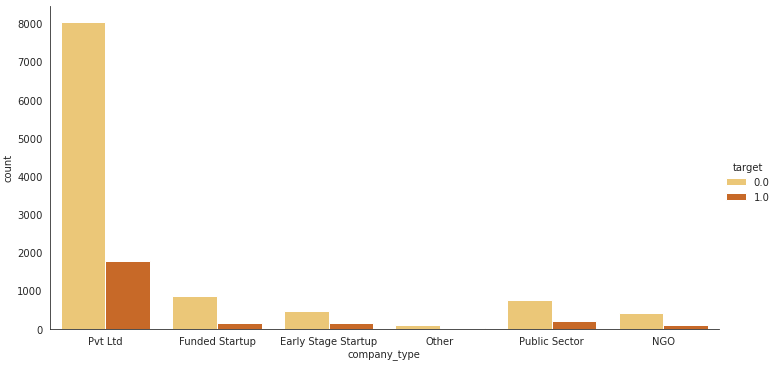

In [32]:
with sns.axes_style('white'):
    c_type = sns.factorplot("company_type", data=df, aspect=2.0, kind='count',
                       hue='target',palette = 'YlOrBr')

* People who are working in private companies have lesser possibility of changing their job.

In [33]:
df["company_type"].fillna("Pvt Ltd", inplace = True)
c_type = pd.get_dummies(df['company_type'])
df.drop(['company_type'],axis=1,inplace=True)
df = pd.concat([df,c_type],axis=1)

df.drop(['Funded Startup','Early Stage Startup','NGO','Other'],axis=1,inplace=True)

#### i) training_hours

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

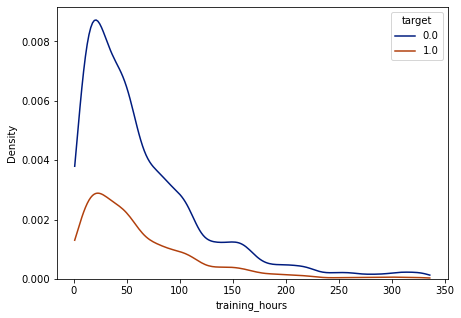

In [34]:
plt.figure(figsize=(7,5))
sns.kdeplot(data=df, x="training_hours",hue='target',cut=0,palette='dark')

* From this graph, we can observe that employees with less training hours had a decreased likelihood of changing employment.

#### Data after treatment of missing values and encoding

In [35]:
df.head()

,city_development_index,training_hours,target,Female,Male,Has relevent experience,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
0,0.920,36,1.0,0,1,1,0,1,1,0,0,1,0,1
1,0.776,47,0.0,0,1,0,0,1,1,0,0,1,0,1
2,0.624,83,0.0,0,1,0,1,0,1,0,0,1,0,1
3,0.789,52,1.0,0,1,0,0,1,1,0,0,0,0,1
4,0.767,8,0.0,0,1,1,0,1,0,0,1,1,0,0


In [36]:
df.isnull().sum()

city_development_index     0
training_hours             0
target                     0
Female                     0
Male                       0
Has relevent experience    0
Full time course           0
no_enrollment              0
Graduate                   0
High School                0
Masters                    0
STEM                       0
Public Sector              0
Pvt Ltd                    0
dtype: int64

#### Rescaling the training_hours

In [37]:
from sklearn.preprocessing import MinMaxScaler
df.training_hours = MinMaxScaler().fit_transform(np.array(df.training_hours).reshape(-1,1))

In [38]:
df.head()

,city_development_index,training_hours,target,Female,Male,Has relevent experience,Full time course,no_enrollment,Graduate,High School,Masters,STEM,Public Sector,Pvt Ltd
0,0.920,0.104478,1.0,0,1,1,0,1,1,0,0,1,0,1
1,0.776,0.137313,0.0,0,1,0,0,1,1,0,0,1,0,1
2,0.624,0.244776,0.0,0,1,0,1,0,1,0,0,1,0,1
3,0.789,0.152239,1.0,0,1,0,0,1,1,0,0,0,0,1
4,0.767,0.020896,0.0,0,1,1,0,1,0,0,1,1,0,0


In [39]:
df.shape

(19158, 14)

## Imbalanced data

In [40]:
df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

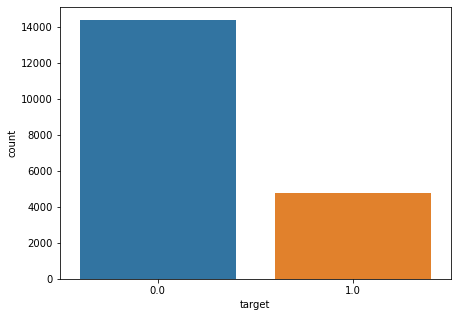

In [41]:
plt.figure(figsize=(7,5))
ax=sns.countplot(df.target)
plt.xticks(rotation=0)

* Here it is clearly visible that the data is highly imbalanced. In order to train the model properly, we need to balance and for the same we use **SMOTE** (Synthetic Minority Oversampling Technique) to balance the data.

In [42]:
y = df['target']
features_col = ['city_development_index', 'training_hours',
       'Female', 'Male', 'Has relevent experience', 'Full time course',
       'no_enrollment', 'Graduate', 'High School', 'Masters', 'STEM', 'Public Sector', 'Pvt Ltd']
X = df[features_col]

In [43]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y,stratify=y, 
                                                    test_size=0.30,random_state = 0)

In [44]:
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

In [45]:
y_smote.value_counts()

0.0    14381
1.0    14381
Name: target, dtype: int64

In [46]:
X_smote.shape

(28762, 13)

## Buliding Models

* For Gradient Boosting Classifier, we used scikit-learn library (written as sklearn in coding) and xgboost for XGBoost Classifier.
* For our analysis, we are using two modeling techniques and for both we are using **StratifiedKFold** cross validation to correctly represents the test folds for the minority class and to validate the same with StratifiedKFold for our techniques.

#### A) Gradient Boosting Model

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier()
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(gbc_model, X_smote, y_smote, scoring='accuracy', cv=folds)
scores

array([0.74847905, 0.75404137, 0.74704451, 0.75156467, 0.76216968])

In [48]:
scores.mean()*100,scores.std()*100

(75.26598567307327, 0.5339588278653704)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
# Define model
gbc_model = GradientBoostingClassifier()
# Fit model
gbc_model.fit(X, y)

GradientBoostingClassifier()

In [51]:
print(confusion_matrix(test_y,gbc_model.predict(test_X)))

[[3887  428]
 [ 808  625]]


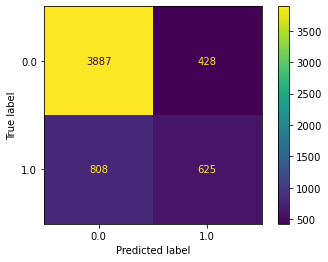

In [52]:
cm=confusion_matrix(test_y,gbc_model.predict(test_X))
gbc_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=gbc_model.classes_)
gbc_display.plot()

In [53]:
print(classification_report(test_y,gbc_model.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4315
         1.0       0.59      0.44      0.50      1433

    accuracy                           0.78      5748
   macro avg       0.71      0.67      0.68      5748
weighted avg       0.77      0.78      0.77      5748



In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,gbc_model.predict(test_X)))

0.7849686847599165


* Through the **Gradient Boosting Classifier**, our True Negatives are 3887 and True Positives are 625 whereas the accuracy score is 78%, which can predict the outcome to a reasonably acceptable level.

#### B) XGBoost Model

In [55]:
from xgboost import XGBClassifier
# Define model
xg = XGBClassifier()
# Fit model
xg.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(xg, X_smote, y_smote, scoring='accuracy', cv=folds)
scores

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:54:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:54:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:54:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.81035981, 0.81192421, 0.81293463, 0.8174548 , 0.82232267])

In [57]:
scores.mean()*100,scores.std()*100

(81.49992251729581, 0.4356720914220157)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [59]:
print(confusion_matrix(test_y,xg.predict(test_X)))

[[4019  296]
 [ 718  715]]


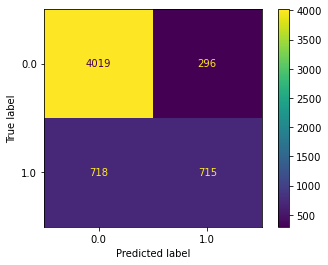

In [60]:
cm=confusion_matrix(test_y,xg.predict(test_X))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=xg.classes_)
cm_display.plot()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(test_y,xg.predict(test_X)))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      4315
         1.0       0.71      0.50      0.59      1433

    accuracy                           0.82      5748
   macro avg       0.78      0.72      0.74      5748
weighted avg       0.81      0.82      0.81      5748



In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,xg.predict(test_X)))

0.8235908141962421


* Through the **XGBoost Model**, our True Negatives are 4019 and True Positives are 715 whereas the accuracy score is 82%, which can predict the outcome to a reasonably acceptable level.

#### Conclusion
It has been noted that, while running models several times the accuracy scores may slightly vary.
Out of the two models, we used in our analysis **Gradient Boosting** having accuracy score of **78%** while the accuracy score of **XGBoost** is **82%**. To the data pertains to the HR analytics the **XGBoost** model is the best performing model that can be used for a reasonable acceptable outcome level.